# Water Phantom Simulation

In [1]:
from geant4 import *
from geant4.utils import WaterPhantom
from geant4.utils import MedicalBeam
from geant4.utils import EventCounter


#####################################################################
!!! Warning !!!
A non-system python (e.g. Anaconda version of Python) is detected.
If you have a problem with Qt5 library version,
set the environment variables, "G4PY_QT5_PRELOAD = 1"
to preload the system Qt5 library as a temporal solution.
Please consider to install Geant4 library without the Qt feature.
#####################################################################

  _____              __  ____ ___
 / ___/__ ___ ____  / /_/ / // _ \__ __  Geant4-Python Interface
/ (_ / -_) _ `/ _ \/ __/_  _/ ___/ // /  Version: 1100
\___/\__/\_,_/_//_/\__/ /_//_/   \_, /   Date: (31-October-2021)
                                /___/

Environment variable "G4FORCE_RUN_MANAGER_TYPE" enabled with value == Serial. Forcing G4RunManager type...

**************************************************************
 Geant4 version Name: geant4-10-07-ref-09 [MT]   (31-October-2021)
                       Copyright : Geant4 Collaborati

----
## Building up Geant4 application
* Geometry : Water Phantom
* Physics List : FTFP_BERT
* Primary Generator : Medical beam

In [30]:
# run action
class MyRunAction(G4UserRunAction):
    def BeginOfRunAction(self, run):
        print("*** (BRA) #event to be processed = ",
              run.GetNumberOfEventToBeProcessed())

    def EndOfRunAction(self, run):
      print ("*** (ERA) run ID = ", run.GetRunID())

In [3]:
# set detectot construction
global water_phantom
phantom = WaterPhantom()
gRunManager.SetUserInitialization(phantom)

# set physics list
global physics_list
physics_list = FTFP_BERT()
gRunManager.SetUserInitialization(physics_list)

# Medical Beam as PGA
global medical_beam
medical_beam = MedicalBeam()

# User Action Initialization
class AppBuilder(G4VUserActionInitialization):
    def Build(self):
        # setup PGA
        self.SetUserAction(medical_beam)
        
        global runaction
        runaction = MyRunAction()
        self.SetUserAction(runaction)
        
        global eventaction
        eventaction = EventCounter()
        eventaction.SetCheckCounter(10000)
        self.SetUserAction(eventaction)

<<< Geant4 Physics List simulation engine: FTFP_BERT



In [4]:
print("*** Medical beam parameters ***")
print("* particle:", medical_beam.particleType)
print("* kineticE:", medical_beam.kineticE/MeV, "MeV")
print("* SSD:", medical_beam.ssd/cm, "cm")
print("* filedSize:", medical_beam.fieldSize/cm, "cm")
print("* surfaceZ:", medical_beam.surfaceZ/cm, "cm")

*** Medical beam parameters ***
* particle: ParticleType.kElectron
* kineticE: 20.0 MeV
* SSD: 100.0 cm
* filedSize: 10.0 cm
* surfaceZ: -15.0 cm


In [5]:
# initialization
global app_builder
app_builder = AppBuilder()
gRunManager.SetUserInitialization(app_builder)

gRunManager.Initialize()
gRunManager.BeamOn(0)

--- G4CoupledTransportation is used 

 hInelastic FTFP_BERT : threshold between BERT and FTFP is over the interval 
 for pions :   3 to 6 GeV
 for kaons :   3 to 6 GeV
 for proton :  3 to 6 GeV
 for neutron : 3 to 6 GeV

### Adding tracking cuts for neutron  TimeCut(ns)= 10000  KinEnergyCut(MeV)= 0
======                 Electromagnetic Physics Parameters      ========
LPM effect enabled                                 1
Enable creation and use of sampling tables         0
Apply cuts on all EM processes                     0
Use general process                                0
Enable linear polarisation for gamma               0
Enable sampling of quantum entanglement            0
X-section factor for integral approach             0.8
Min kinetic energy for tables                      100 eV 
Max kinetic energy for tables                      100 TeV
Number of bins per decade of a table               7
Verbose level                                      1
Verbose level for worker thread

In [ ]:
# visualization
#from geant4.utils import VisControlPanel
#viscp = VisControlPanel()

-----
## Scoring  and Run

In [31]:
!cat scoring.mac

# scoring.mac

# define scoring mesh
/score/create/boxMesh  voxel_dose
/score/mesh/boxSize 15.25 15.25 15. cm
/score/mesh/translate/xyz 0. 0. 0. mm
#
/score/mesh/nBin 61 61 150
#/score/mesh/nBin 10 10 100 
/score/quantity/doseDeposit dose
/score/close
/score/list



In [6]:
gControlExecute("scoring.mac")

.... G4ScoringMessenger::MeshBinCommand - G4ScoringBox
G4ScoringManager has 1 scoring meshes.
G4ScoringBox : voxel_dose --- Shape: Box mesh
 Size (x, y, z): (15.25, 15.25, 15) [cm]
 # of segments: (61, 61, 150)
 displacement: (0, 0, 0) [cm]
 registered primitve scorers : 
   0  dose


### Run conditions
> 1. e- 20 MeV
> 2. proton 200 MeV

In [7]:
#medical_beam.particleType = MedicalBeam.ParticleType.kElectron
#medical_beam.kineticE = 20.*MeV

medical_beam.particleType = MedicalBeam.ParticleType.kProton
medical_beam.kineticE = 200.*MeV

gRunManager.BeamOn(1000000)

# output
#gScoringManager.DumpQuantityToFile("voxel_dose", "dose", "dose_e20.csv")
gScoringManager.DumpQuantityToFile("voxel_dose", "dose", "dose_p200.csv")

*** (BRA) #event to be processed =  1000000
[MESSAGE] event-loop check point: 10000 events processed.
[MESSAGE] event-loop check point: 20000 events processed.
[MESSAGE] event-loop check point: 30000 events processed.
[MESSAGE] event-loop check point: 40000 events processed.
[MESSAGE] event-loop check point: 50000 events processed.
[MESSAGE] event-loop check point: 60000 events processed.
[MESSAGE] event-loop check point: 70000 events processed.
[MESSAGE] event-loop check point: 80000 events processed.
[MESSAGE] event-loop check point: 90000 events processed.
[MESSAGE] event-loop check point: 100000 events processed.
[MESSAGE] event-loop check point: 110000 events processed.
[MESSAGE] event-loop check point: 120000 events processed.
[MESSAGE] event-loop check point: 130000 events processed.
[MESSAGE] event-loop check point: 140000 events processed.
[MESSAGE] event-loop check point: 150000 events processed.
[MESSAGE] event-loop check point: 160000 events processed.
[MESSAGE] event-loop 

----
# Analysis

In [9]:
import pandas
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as colors

In [10]:
# voxel id -> position
def xypos(ix):
    return 0.5*(ix-30)

def zpos(iz):
    return 0.1 + 0.2*iz

# make XZ dose
def make_xzdose(fname) :
    df_xyz = pandas.read_csv(fname, skipinitialspace=True, 
                             header=None, names=['ix','iy','iz','dose','dose2','entry'], comment='#')
    
    # select center plane, and drop iy
    df_xz_dose = df_xyz[df_xyz['iy']==30].drop(columns=['iy'])
    
    df_xz_dose['ix'] = df_xz_dose['ix'].apply(xypos)
    df_xz_dose['iz'] = df_xz_dose['iz'].apply(zpos)
    
    # pivot
    dose_xz = df_xz_dose.pivot(index='ix', columns='iz', values='dose')
    xmin, xmax = dose_xz.columns.min(), dose_xz.columns.max()
    ymin, ymax = dose_xz.index.min(), dose_xz.index.max()

    return dose_xz, [xmin, xmax], [ymin, ymax]

In [11]:
# make depth dose
def make_depth_dose(fname):
    df_xyz = pandas.read_csv(fname, skipinitialspace=True,
                             header=None, names=['ix','iy','iz','dose','dose2','entry'], comment='#')

    df_xyz_sel = df_xyz.query('ix==30 & iy==30')
    
    z_array = df_xyz_sel['iz'].apply(zpos)
    dose_array = df_xyz_sel['dose']
    
    dose_sum = dose_array.sum()/10000.
    print("Sum dose/k = ", dose_sum )
    
    return dose_array, z_array

In [26]:
# make dose plots
def plot_dose(fname):    
    dose_xz, xrange, yrange = make_xzdose(fname)

    xmin = xrange[0]; xmax = xrange[1]
    ymin = yrange[0]; ymax = yrange[1]
     
    # make plots
    plt.rcdefaults()
    fig = plt.figure(figsize=(12,4))
    plt.axis('off')
    
    # dose map (XZ)
    plot = fig.add_subplot(1,2,1)
    img = plot.imshow(dose_xz, cmap='jet', extent=[xmin,xmax, ymin, ymax])
    plt.colorbar(img)
    plot.set_xlabel('Z (cm)')
    plot.set_ylabel('X (cm)')
    plot.grid(False)
    ax = plt.gca()
    ax.set_title('Dose (XZ)')

    # depth dose
    dose_z, z_array = make_depth_dose(fname)  
    plot = fig.add_subplot(1,2,2)
    plt.plot(z_array, dose_z, 'o-', markersize=4, label="Dose")
    
    plt.grid(True)
    plt.legend()
    plt.xlim(0., 30.)
    plot.set_xlabel('Z (cm)')
    plot.set_ylabel('Dose')
    ax = plt.gca()
    ax.set_title('Depth Dose (center)')
  
    #
    plt.show()

### Electron 20 MeV

Sum dose/k =  1.303546326741707e-08


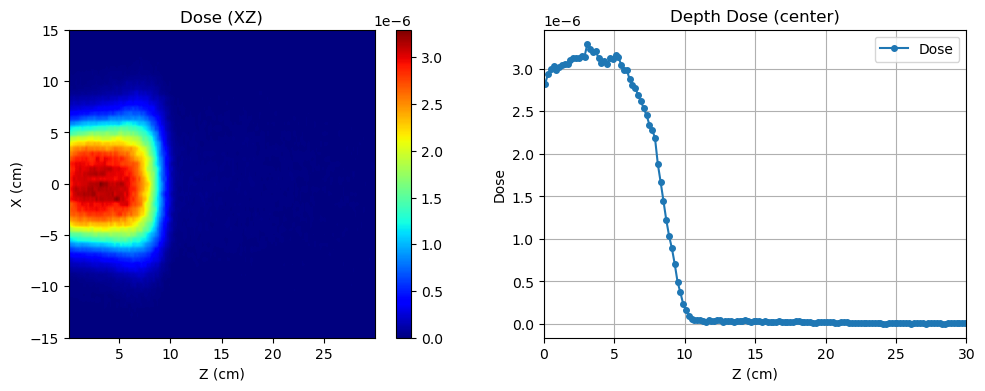

In [27]:
plot_dose("dose_e20.csv")

### Proton 200 MeV

Sum dose/k =  1.1409669100868195e-07


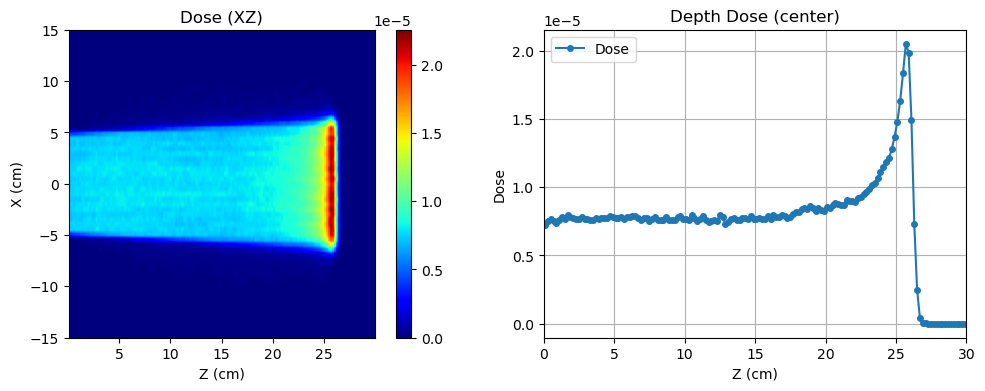

In [28]:
plot_dose("dose_p200.csv")